# **Лабораторная работа №2**

# **1.1 Оценки математического ожидания, дисперсии, медианы**

# **Задача №1**

Пусть случайная величина ξ имеет распределение, задаваемое плотностью f ξ(x) = θ^2 * xe^(−θx). Для каждого θ ∈ {0.5, 2, 8}:

1) Аналитически вычислить математическое ожидание, дисперсию и
математическое ожидание квадрата ξ. Привести в отчет.

2) Для k ∈ {2^4, 2^5, . . . , 2^15} построить выборку из k элементов. Для каждой из них посчитать оценки: математического ожидания, дисперсии и квадрата математического ожидания параметра из варианта. Для каждой из выборок и оценок визуализировать это все на графиках (для каждой оценки — свой график), где по вертикальной оси — оценка, а по горизонтальной — k, плюс, добавьте горизонтальную линию, отвечающую за аналитически полученную оценку.

# **Решение**

Представлена плотность гамма-распределения с параметрами k = 2 и a = 1 / θ

1.
Математическое ожидание гамма-распределения E(ξ) = ka = 2 / θ

Дисперсия гамма-распределения D(ξ) = k(a^2) = 2 / (θ^2)

Мат. ожидания квадрата гамма-распределения E(ξ^2) = D(ξ) + E(ξ)^2 = 2 / (θ^2) + 4 / (θ^2) = 6 / (θ^2)


---

При θ = 0.5:

E(ξ) = 2 / 0.5 = 4

D(ξ) = 2 / 0.5^2 = 8

E(ξ^2) = 6 / 0.5^2 = 24


---


При θ = 2:

E(ξ) = 2 / 2 = 1

D(ξ) = 2 / 2^2 = 0.5

E(ξ^2) = 6 / 2^2 = 1.5


---


При θ = 8:

E(ξ) = 2 / 8 = 0.125

D(ξ) = 2 / 8^2 = 0.03125

E(ξ^2) = 6 / 8^2 = 0.09375

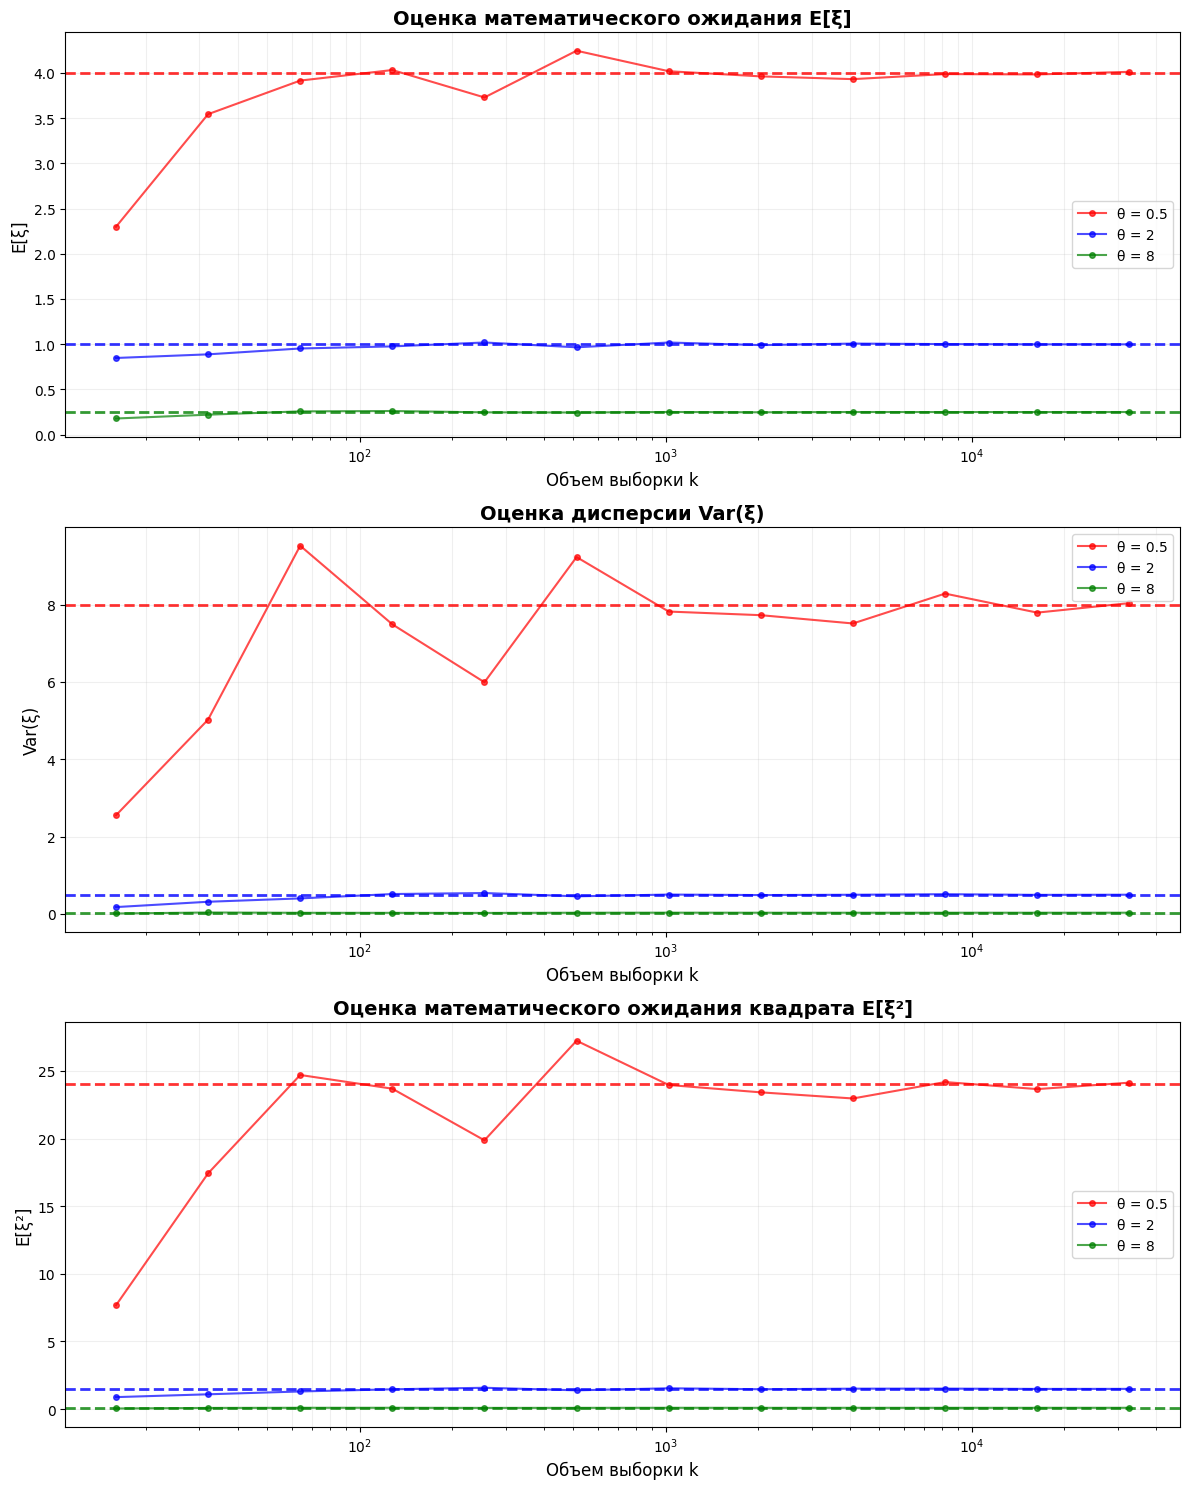


Аналитические значения:
θ = 0.5: E[ξ] = 4.0000, Var(ξ) = 8.0000, E[ξ²] = 24.0000
θ = 2: E[ξ] = 1.0000, Var(ξ) = 0.5000, E[ξ²] = 1.5000
θ = 8: E[ξ] = 0.2500, Var(ξ) = 0.0312, E[ξ²] = 0.0938


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
import seaborn as sns

# Настройка стиля графиков
# plt.style.use('seaborn-v0_8')
# sns.set_palette("husl")

def generate_samples_and_plot():
    """
    Генерирует выборки и строит графики для оценок математического ожидания,
    дисперсии и математического ожидания квадрата
    """

    # Параметры
    theta_values = [0.5, 2, 8]
    k_values = [2**i for i in range(4, 16)]  # k от 2^4 до 2^15

    # Аналитические значения для каждого theta
    analytical_values = {}
    for theta in theta_values:
        E_xi = 2 / theta
        Var_xi = 2 / theta**2
        E_xi2 = 6 / theta**2
        analytical_values[theta] = {'E_xi': E_xi, 'Var_xi': Var_xi, 'E_xi2': E_xi2}

    # Создаем фигуры для графиков
    fig, axes = plt.subplots(3, 1, figsize=(12, 15))

    # Цвета для разных theta
    colors = ['red', 'blue', 'green']

    # Для каждого theta
    for idx, theta in enumerate(theta_values):

        # Списки для хранения оценок
        sample_means = []
        sample_vars = []
        sample_means_sq = []

        # Параметры гамма-распределения: shape=2, scale=1/theta
        shape = 2
        scale = 1 / theta

        # Генерируем выборки и вычисляем оценки
        for k in k_values:
            # Генерируем выборку объема k
            sample = gamma.rvs(a=shape, scale=scale, size=k)

            # Вычисляем оценки
            sample_mean = np.mean(sample)
            sample_var = np.var(sample, ddof=1)  # несмещенная оценка
            sample_mean_sq = np.mean(sample**2)

            sample_means.append(sample_mean)
            sample_vars.append(sample_var)
            sample_means_sq.append(sample_mean_sq)

        # График для математического ожидания
        axes[0].semilogx(k_values, sample_means, 'o-', color=colors[idx],
                        label=f'θ = {theta}', alpha=0.7, markersize=4)
        axes[0].axhline(y=analytical_values[theta]['E_xi'], color=colors[idx],
                       linestyle='--', alpha=0.8, linewidth=2)

        # График для дисперсии
        axes[1].semilogx(k_values, sample_vars, 'o-', color=colors[idx],
                        label=f'θ = {theta}', alpha=0.7, markersize=4)
        axes[1].axhline(y=analytical_values[theta]['Var_xi'], color=colors[idx],
                       linestyle='--', alpha=0.8, linewidth=2)

        # График для математического ожидания квадрата
        axes[2].semilogx(k_values, sample_means_sq, 'o-', color=colors[idx],
                        label=f'θ = {theta}', alpha=0.7, markersize=4)
        axes[2].axhline(y=analytical_values[theta]['E_xi2'], color=colors[idx],
                       linestyle='--', alpha=0.8, linewidth=2)

    # Настройка графиков
    titles = ['Оценка математического ожидания E[ξ]',
              'Оценка дисперсии Var(ξ)',
              'Оценка математического ожидания квадрата E[ξ²]']

    ylabels = ['E[ξ]', 'Var(ξ)', 'E[ξ²]']

    for i, ax in enumerate(axes):
        ax.set_title(titles[i], fontsize=14, fontweight='bold')
        ax.set_xlabel('Объем выборки k', fontsize=12)
        ax.set_ylabel(ylabels[i], fontsize=12)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=10)

        # Добавляем сетку для лучшей читаемости
        ax.grid(True, which="both", ls="-", alpha=0.2)

    plt.tight_layout()
    plt.show()

    return analytical_values

analytical_vals = generate_samples_and_plot()

# Вывод аналитических значений
print("\nАналитические значения:")
for theta in [0.5, 2, 8]:
    print(f"θ = {theta}: E[ξ] = {analytical_vals[theta]['E_xi']:.4f}, "
          f"Var(ξ) = {analytical_vals[theta]['Var_xi']:.4f}, "
          f"E[ξ²] = {analytical_vals[theta]['E_xi2']:.4f}")


# **Задача №2**

Дана плотность распределения случайной величины ξ:

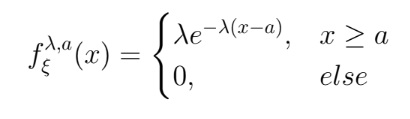

Пусть (λ, a) = (2, 2)

(a) Аналитически вычислите значение моды, математического ожидания и медианы.

(b) Создайте две выборки: одну довольно большого размера (10000 наблюдений, например), а вторую маленькую (например, 20). Постройте оценки моды, математического ожидания и медианы.

(c) Постройте для первой выборки на одном графике: гистограмму распределения значений из выборки и три вертикальных линии оценок моды, математического ожидания и медианы. Для второй выборки сделайте то же самое. Постройте ещё график рядом для первой выборки, но с функцией распределения плотности и аналитическими значениями мод, математического жидания и медианы. То же самое, для второй.

(d) Попробуйте поизменять размер выборки и посмотреть на то, например, сходится ли медиана к математическому ожиданию, или нет.

# **Решение**

а) Аналитические вычисления

Мода - наиболее часто встречающееся значение плотности распределения. Так как распределение - экспоненциальное, с параметром λ = 2 и a = 2 (то есть смещена по оси х на 2 влево), то при х => а плотность убывает, и, соответственно, мода - максимум плотности. То есть мода равна 2

Математическое ожидание плотности с экспоненциальным распределением = 1 / λ, а с учетом смещения оно равно (а + 1 / λ) = 2.5

Медиана - значение, при котором функция распределения F(x) принимает значение 0.5. Функция распределения экспоненциального распределения с учетом параметров (λ, a) = (2, 2) имеет вид F(x) = 1 - e^(-λ(x-a)) при x => a.

Решая уравнение 1 - e^(-λ(x-a)) = 0.5, получаем значение медианы, равное приближенно 2.35

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon

# Параметры распределения
lambda_param = 2
a = 2

# Аналитические значения
mode_analytical = a
mean_analytical = a + 1/lambda_param
median_analytical = a + np.log(2)/lambda_param

print("Аналитические значения:")
print(f"Мода: {mode_analytical}")
print(f"Математическое ожидание: {mean_analytical}")
print(f"Медиана: {median_analytical}")


Аналитические значения:
Мода: 2
Математическое ожидание: 2.5
Медиана: 2.3465735902799727


In [5]:
# решение пункта (b)
np.random.seed(42)
large_sample_size = 10000
small_sample_size = 20

# Генерация выборок из сдвинутого экспоненциального распределения
large_sample = expon.rvs(scale=1/lambda_param, loc=a, size=large_sample_size)
small_sample = expon.rvs(scale=1/lambda_param, loc=a, size=small_sample_size)

# Оценки параметров для выборок
def estimate_parameters(sample):
    mode_est = np.min(sample)
    mean_est = np.mean(sample)
    median_est = np.median(sample)
    return mode_est, mean_est, median_est

large_estimates = estimate_parameters(large_sample)
small_estimates = estimate_parameters(small_sample)

print("Оценки для большой выборки (n=10000):")
print(f"Мода: {large_estimates[0]:.4f}")
print(f"Математическое ожидание: {large_estimates[1]:.4f}")
print(f"Медиана: {large_estimates[2]:.4f}\n")

print("Оценки для маленькой выборки (n=20):")
print(f"Мода: {small_estimates[0]:.4f}")
print(f"Математическое ожидание: {small_estimates[1]:.4f}")
print(f"Медиана: {small_estimates[2]:.4f}")


Оценки для большой выборки (n=10000):
Мода: 2.0000
Математическое ожидание: 2.4887
Медиана: 2.3392

Оценки для маленькой выборки (n=20):
Мода: 2.0035
Математическое ожидание: 2.4125
Медиана: 2.2788


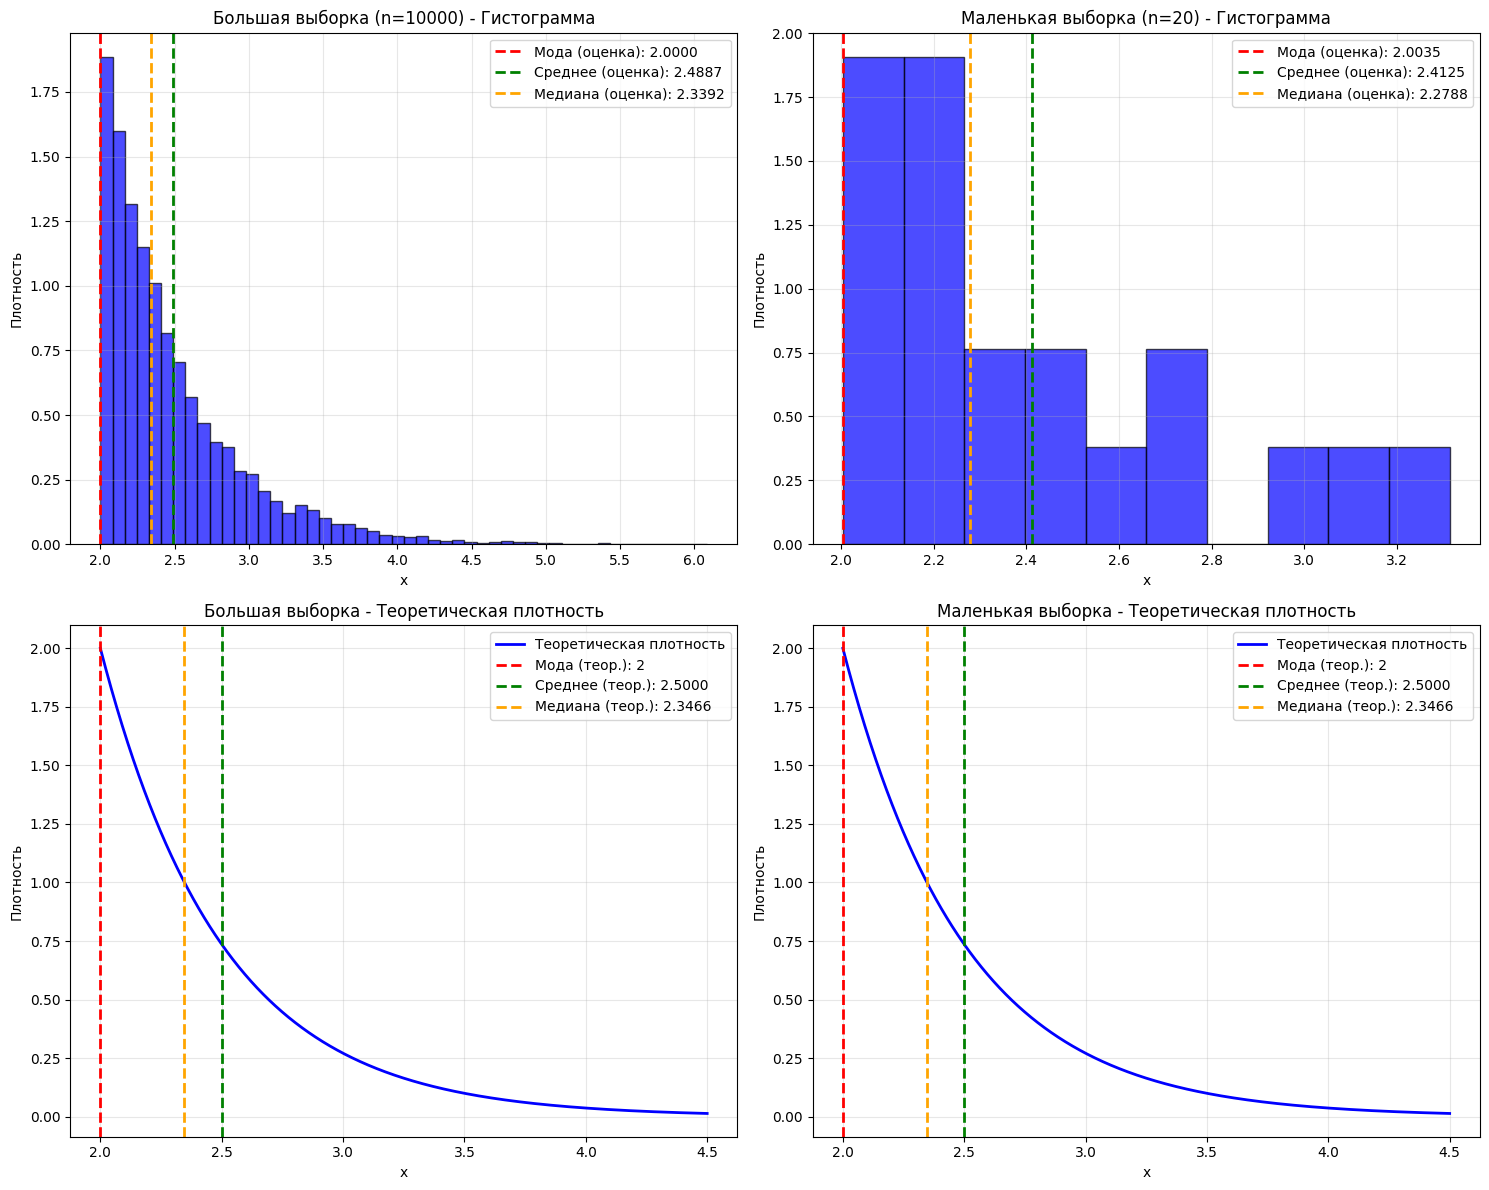

In [8]:
# решение пункта (c)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Гистограмма для большой выборки
axes[0, 0].hist(large_sample, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')
axes[0, 0].axvline(large_estimates[0], color='red', linestyle='--', linewidth=2, label=f'Мода (оценка): {large_estimates[0]:.4f}')
axes[0, 0].axvline(large_estimates[1], color='green', linestyle='--', linewidth=2, label=f'Среднее (оценка): {large_estimates[1]:.4f}')
axes[0, 0].axvline(large_estimates[2], color='orange', linestyle='--', linewidth=2, label=f'Медиана (оценка): {large_estimates[2]:.4f}')
axes[0, 0].set_title('Большая выборка (n=10000) - Гистограмма')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('Плотность')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Гистограмма для маленькой выборки
axes[0, 1].hist(small_sample, bins=10, density=True, alpha=0.7, color='blue', edgecolor='black')
axes[0, 1].axvline(small_estimates[0], color='red', linestyle='--', linewidth=2, label=f'Мода (оценка): {small_estimates[0]:.4f}')
axes[0, 1].axvline(small_estimates[1], color='green', linestyle='--', linewidth=2, label=f'Среднее (оценка): {small_estimates[1]:.4f}')
axes[0, 1].axvline(small_estimates[2], color='orange', linestyle='--', linewidth=2, label=f'Медиана (оценка): {small_estimates[2]:.4f}')
axes[0, 1].set_title('Маленькая выборка (n=20) - Гистограмма')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('Плотность')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Функция плотности для большой выборки
x = np.linspace(a, a + 5/lambda_param, 1000)
density_function = lambda_param * np.exp(-lambda_param * (x - a))

axes[1, 0].plot(x, density_function, 'b-', linewidth=2, label='Теоретическая плотность')
axes[1, 0].axvline(mode_analytical, color='red', linestyle='--', linewidth=2, label=f'Мода (теор.): {mode_analytical}')
axes[1, 0].axvline(mean_analytical, color='green', linestyle='--', linewidth=2, label=f'Среднее (теор.): {mean_analytical:.4f}')
axes[1, 0].axvline(median_analytical, color='orange', linestyle='--', linewidth=2, label=f'Медиана (теор.): {median_analytical:.4f}')
axes[1, 0].set_title('Большая выборка - Теоретическая плотность')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('Плотность')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Функция плотности для маленькой выборки
axes[1, 1].plot(x, density_function, 'b-', linewidth=2, label='Теоретическая плотность')
axes[1, 1].axvline(mode_analytical, color='red', linestyle='--', linewidth=2, label=f'Мода (теор.): {mode_analytical}')
axes[1, 1].axvline(mean_analytical, color='green', linestyle='--', linewidth=2, label=f'Среднее (теор.): {mean_analytical:.4f}')
axes[1, 1].axvline(median_analytical, color='orange', linestyle='--', linewidth=2, label=f'Медиана (теор.): {median_analytical:.4f}')
axes[1, 1].set_title('Маленькая выборка - Теоретическая плотность')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('Плотность')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



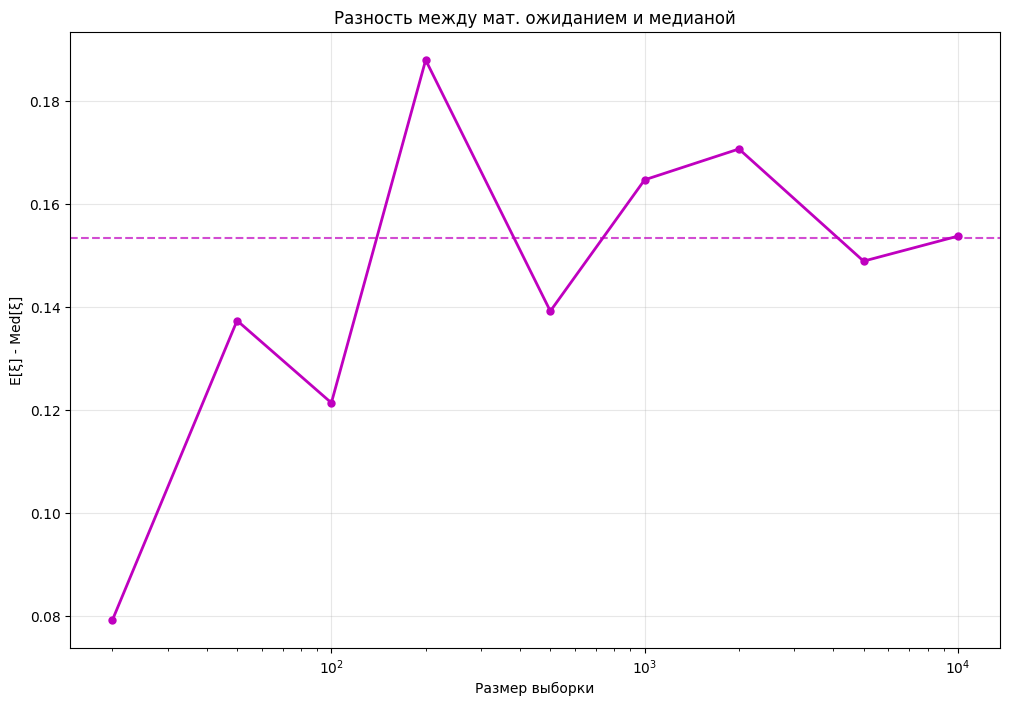

In [7]:
# решение пункта (d)
sample_sizes = [20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]

mode_estimates = []
mean_estimates = []
median_estimates = []

for size in sample_sizes:
    sample = expon.rvs(scale=1/lambda_param, loc=a, size=size)
    mode_est, mean_est, median_est = estimate_parameters(sample)
    mode_estimates.append(mode_est)
    mean_estimates.append(mean_est)
    median_estimates.append(median_est)

# График сходимости оценок
plt.figure(figsize=(12, 8))

plt.semilogx(sample_sizes, np.array(mean_estimates) - np.array(median_estimates), 'mo-', linewidth=2, markersize=5)
plt.axhline(y=mean_analytical - median_analytical, color='m', linestyle='--', alpha=0.7)
plt.title('Разность между мат. ожиданием и медианой')
plt.xlabel('Размер выборки')
plt.ylabel('E[ξ] - Med[ξ]')
plt.grid(True, alpha=0.3)

plt.show()

# **1.2 Моделирование совместного распредления двух СВ**

# **Задача №1**

Пусть совместное распределение двух случайных величин задано таблицей
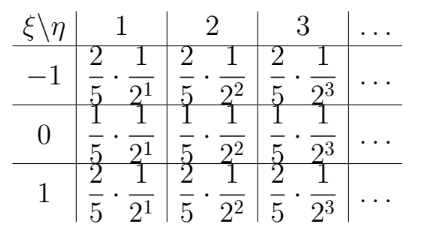

где η принимает все значения из N. Вычислить корреляционую матрицу аналитически и приближенно (на основе моделирования).

# **Решение**

Для вычесления ковариационной матрицы необходимо вычислить ковариацию двух СВ.

Математическое ожидание:

E(ξ) = Σ (ξ * P(ξ)) = 0

E(η) = Σ (η * P(η)) = Σ (η / 2^η)

E(ξ, η) = Σ (ξ * η * P(ξ, η)) = 0


---


Дисперсия:

D(ξ) = E(ξ^2) - E(ξ)^2 = 0

D(η) = E(η^2) - E(η)^2

Ковариация: cov(ξ, η) = E(ξ, η) - E(ξ)E(η)

Корреляция: p = cov(ξ, η) / sqrt(D(ξ) D(η))